In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


In [3]:
DATA_FOLDER = "/tmp/data"

In [4]:
import py7zr
files = ['test.csv.7z', 'members.csv.7z', 'sample_submission.csv.7z', 
         'song_extra_info.csv.7z', 'songs.csv.7z', 'train.csv.7z']
for file in files:
    with py7zr.SevenZipFile(f'/kaggle/input/kkbox-music-recommendation-challenge/{file}', 'r') as archive:
        archive.extractall(path=DATA_FOLDER)

In [5]:
import os
for dirname, _, filenames in os.walk(DATA_FOLDER):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/tmp/data/songs.csv
/tmp/data/song_extra_info.csv
/tmp/data/members.csv
/tmp/data/train.csv
/tmp/data/sample_submission.csv
/tmp/data/test.csv


In [6]:
train = pd.read_csv(DATA_FOLDER + '/train.csv')
test = pd.read_csv(DATA_FOLDER + '/test.csv')
members = pd.read_csv(DATA_FOLDER + '/members.csv')
songs = pd.read_csv(DATA_FOLDER + '/songs.csv')
songs_extra = pd.read_csv(DATA_FOLDER + '/song_extra_info.csv')
sample_submission = pd.read_csv(DATA_FOLDER + '/sample_submission.csv')

In [7]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [9]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [10]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [11]:
sample_submission.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [12]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [13]:
train.info()
print('\n')
songs.info()
print('\n')
members.info()
print('\n')
songs_extra.info()
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  -

У большего числа юзеров отсутствует пол

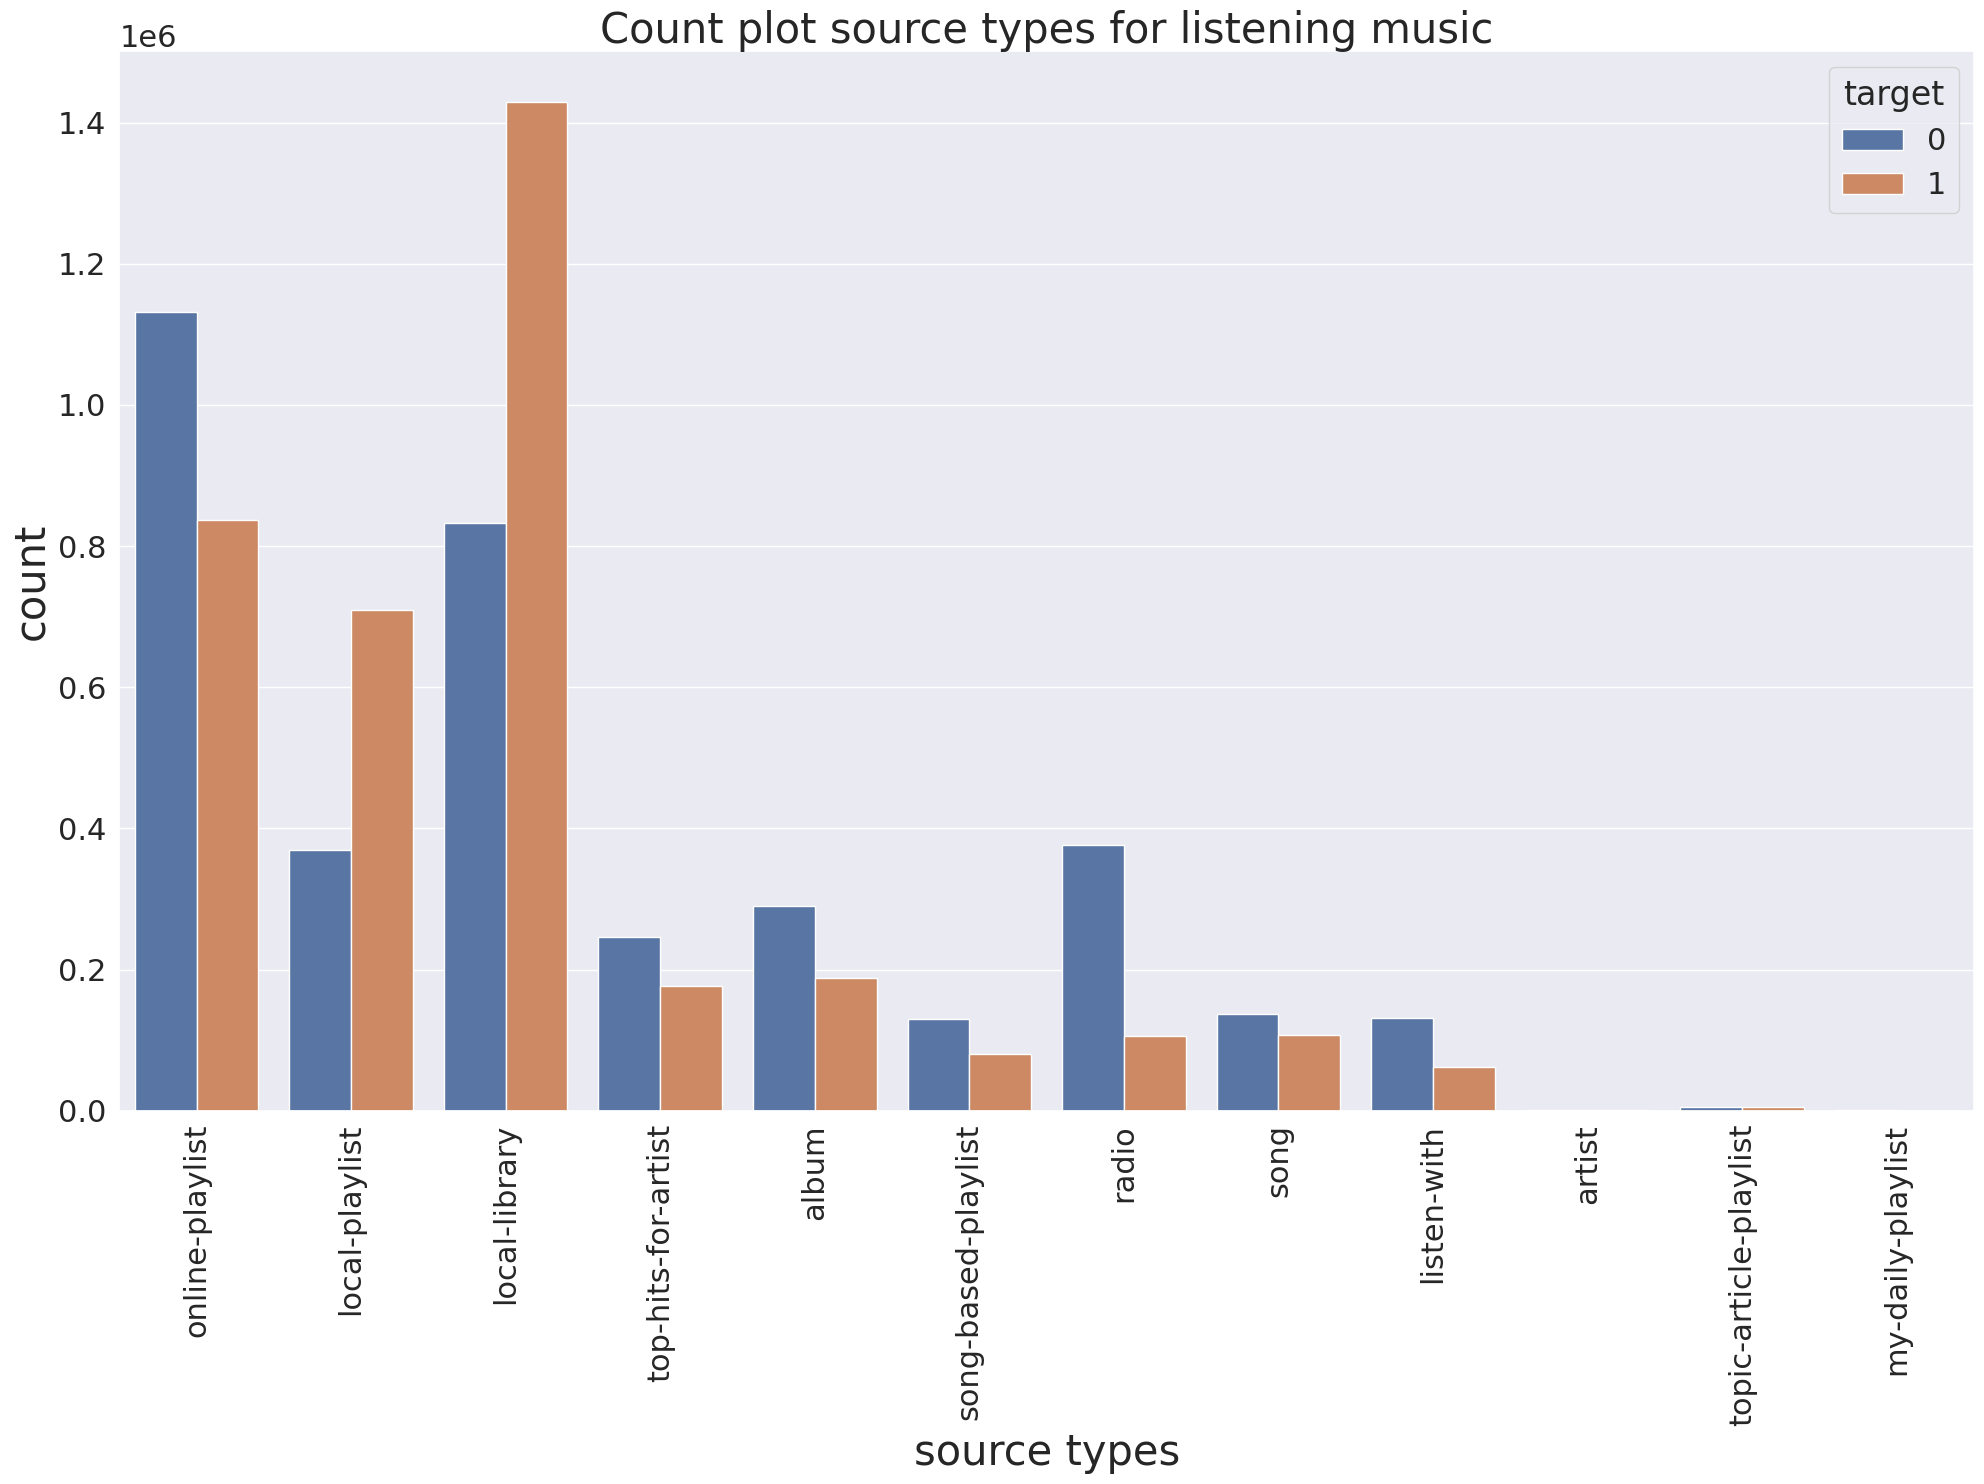

In [14]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='target',data=train)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='vertical')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

Большее число песен, которые люди продолжают слушать находится в локальной библиотеке или плейлисте, в онлайн плейлисте повторных прослушиваний меньше

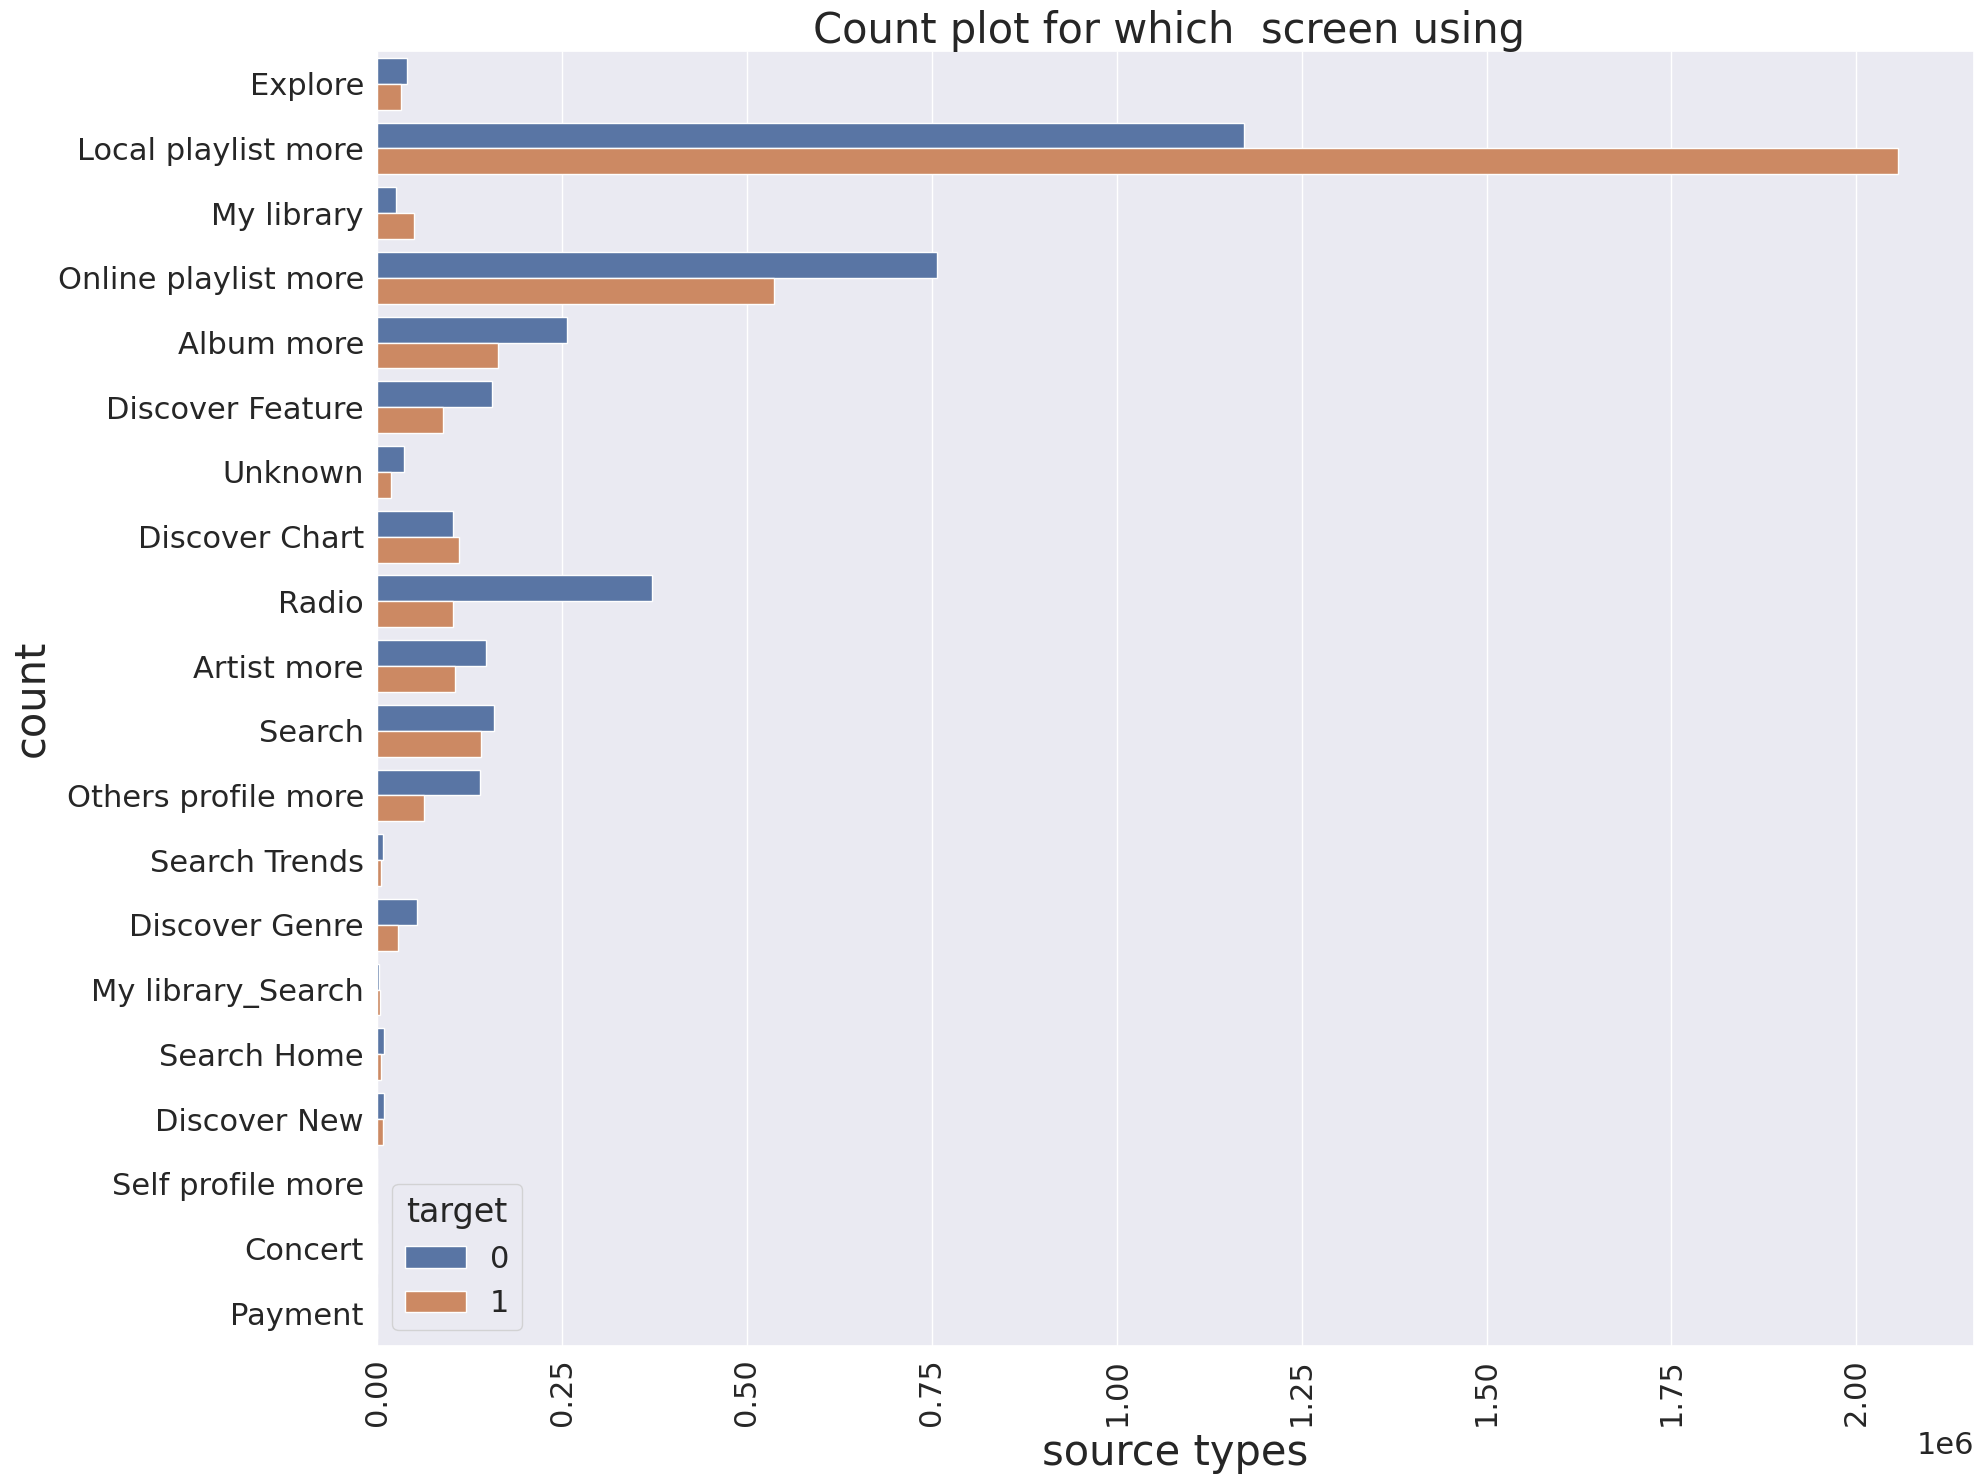

In [15]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name', data=train, hue='target')
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='vertical')
plt.title('Count plot for which  screen using ',fontsize=30)
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'registration time ')

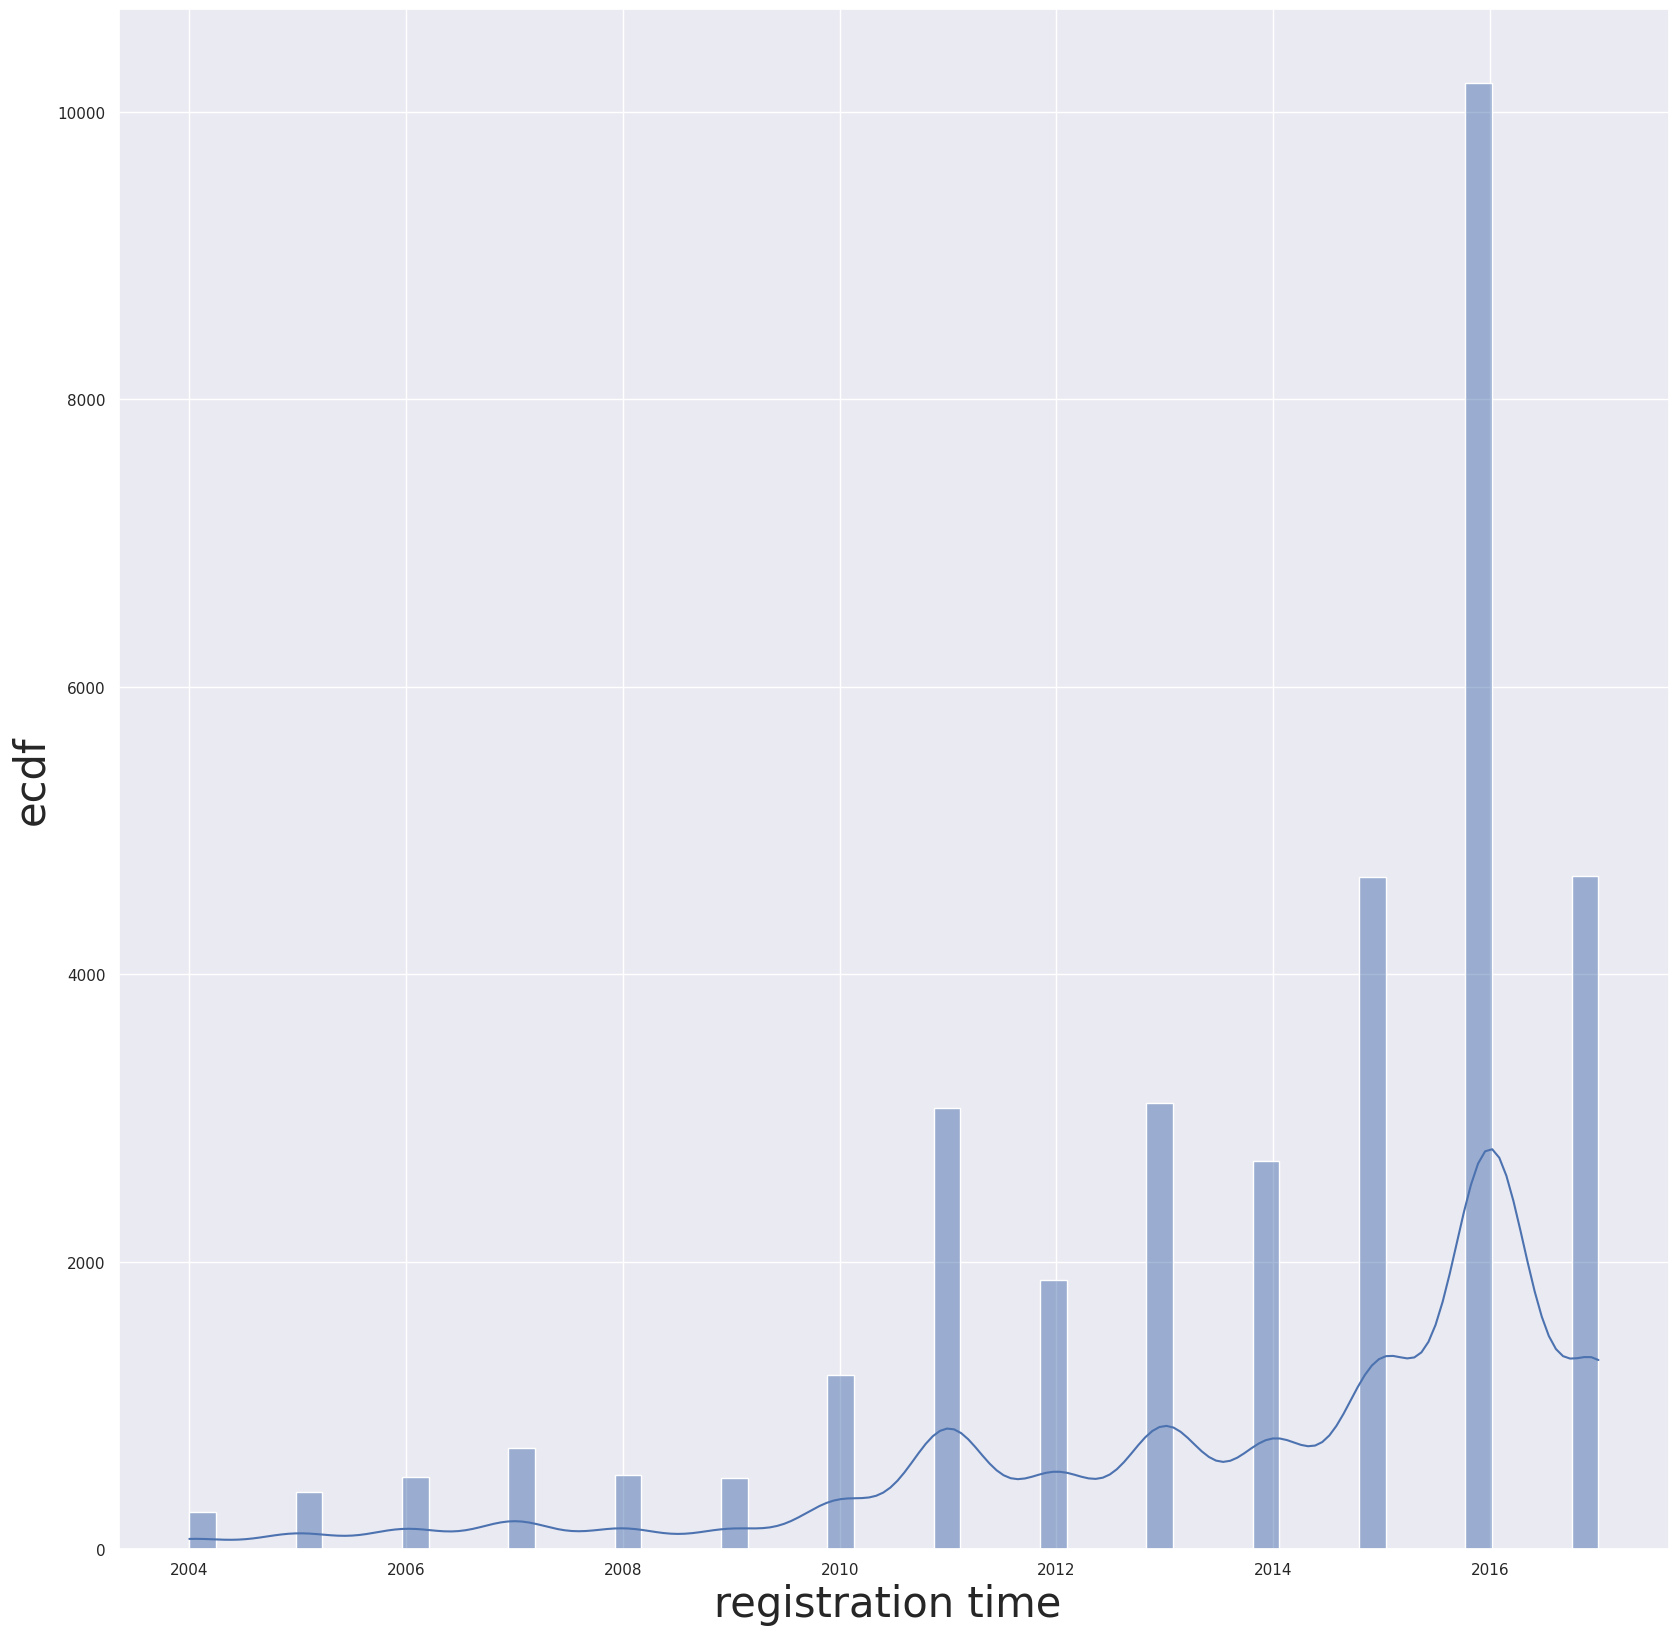

In [16]:
members_reg_years = members.copy()
members_reg_years['registration_init_time'] //= 10000
plt.figure(figsize = (20, 20)) 
sns.histplot(data=members_reg_years, x='registration_init_time', kde=True)
sns.set(font_scale=2)
plt.ylabel('ecdf',fontsize=30)
plt.xlabel('registration time ' ,fontsize=30)

Большее число юзеров зарегестрировалось в 2016 году

In [17]:
train_merged = train.copy().merge(songs, on='song_id', how='left').merge(members, on='msno', how='left')

In [18]:
len(train), len(train_merged)

(7377418, 7377418)

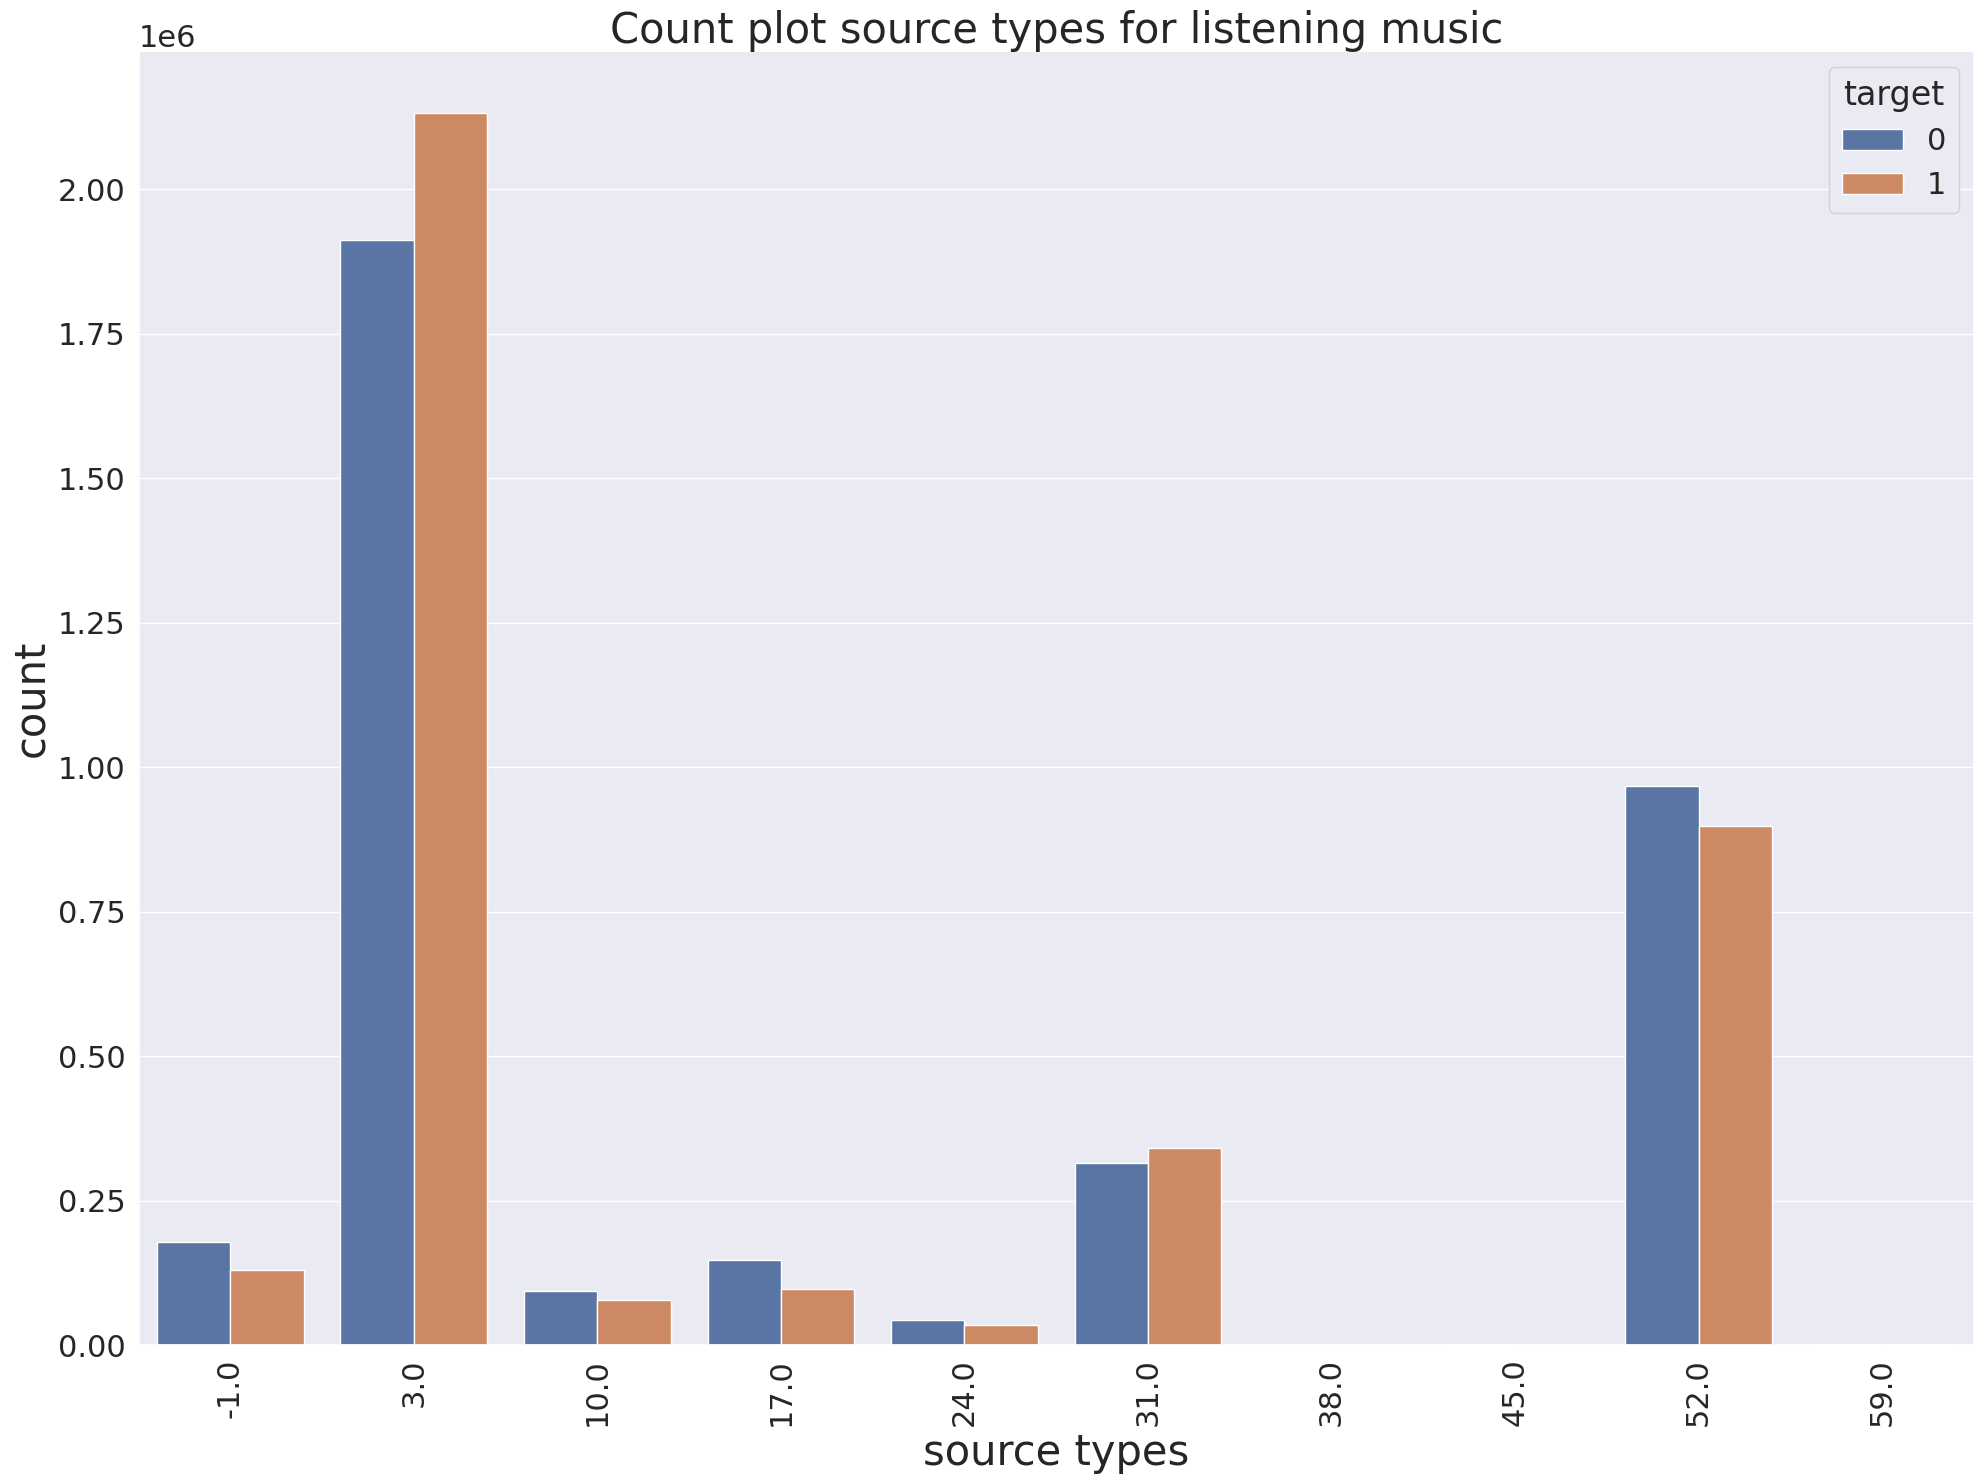

In [19]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='language',hue='target',data=train_merged)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='vertical')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

In [20]:
train_merged['bd'].describe()

count    7.377418e+06
mean     1.753927e+01
std      2.155447e+01
min     -4.300000e+01
25%      0.000000e+00
50%      2.100000e+01
75%      2.900000e+01
max      1.051000e+03
Name: bd, dtype: float64

In [21]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 1013.1+ MB


In [22]:
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [23]:
train = pd.read_csv(DATA_FOLDER + '/train.csv')

members = pd.read_csv(DATA_FOLDER + '/members.csv')
songs = pd.read_csv(DATA_FOLDER + '/songs.csv')
songs_extra = pd.read_csv(DATA_FOLDER + '/song_extra_info.csv')

song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
members['registration_year'] = members['registration_init_time'] // 10000
members['registration_month'] = members['registration_init_time'] // 100 % 100

members['expiration_year'] = members['expiration_date'] // 10000
members['expiration_month'] = members['expiration_date'] // 100 % 100

member_cols = ['msno','city','registered_via', 'registration_year', 'expiration_year']

train_merged = train.copy().merge(songs[song_cols], on='song_id', how='left').merge(members[member_cols], on='msno', how='left')

In [24]:
def isrc_to_year(isrc):
    if type(isrc) == str:
        return int(isrc[5:7])//5
    return np.nan

songs_extra['song_year'] = songs_extra['isrc'].apply(isrc_to_year)
songs_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   song_id    object 
 1   name       object 
 2   isrc       object 
 3   song_year  float64
dtypes: float64(1), object(3)
memory usage: 70.1+ MB


In [25]:
train_merged = train_merged.merge(songs_extra[['song_id', 'song_year']], on='song_id', how='left')

In [26]:
train_merged

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,registered_via,registration_year,expiration_year,song_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,206471.0,52.0,1,7,2012,2017,3.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Various Artists,1259,284584.0,52.0,13,9,2011,2017,19.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,9,2011,2017,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,Soundway,1019,255512.0,-1.0,13,9,2011,2017,2.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,7,2012,2017,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,Dr. Dre,1259,267958.0,52.0,4,9,2004,2017,19.0
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,R. City feat. Adam Levine,465,227404.0,52.0,1,7,2013,2017,3.0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),465,258298.0,3.0,1,7,2013,2017,3.0
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,Brad Mehldau Trio,2122,524146.0,52.0,5,9,2015,2017,1.0


In [27]:
train_merged['genre_ids'] = train_merged['genre_ids'].str.split('|').str[0]

In [28]:
song_count = train.loc[:,["song_id","target"]]

song_count1 = song_count.groupby(["song_id"],as_index=False).sum().rename(columns={"target":"repeat_count"})
song_count2 = song_count.groupby(["song_id"],as_index=False).count().rename(columns = {"target":"play_count"})

song_repeat = song_count1.merge(song_count2,how="inner",on="song_id")
song_repeat["repeat_percentage"] = round((song_repeat['repeat_count']*100) / song_repeat['play_count'],1)
song_repeat['repeat_count'] = song_repeat['repeat_count'].astype('int')
song_repeat['repeat_percentage'] = song_repeat['repeat_percentage'].replace(100.0,np.nan)

In [29]:
train_merged = train_merged.merge(song_repeat,on="song_id",how="left")

In [30]:
train_merged

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,registered_via,registration_year,expiration_year,song_year,repeat_count,play_count,repeat_percentage
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,206471.0,52.0,1,7,2012,2017,3.0,102,215,47.4
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,Various Artists,1259,284584.0,52.0,13,9,2011,2017,19.0,1,1,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,9,2011,2017,1.0,2,4,50.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,Soundway,1019,255512.0,-1.0,13,9,2011,2017,2.0,1,1,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,7,2012,2017,3.0,150,412,36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,Dr. Dre,1259,267958.0,52.0,4,9,2004,2017,19.0,32,59,54.2
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,R. City feat. Adam Levine,465,227404.0,52.0,1,7,2013,2017,3.0,666,1010,65.9
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),465,258298.0,3.0,1,7,2013,2017,3.0,7608,10500,72.5
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,Brad Mehldau Trio,2122,524146.0,52.0,5,9,2015,2017,1.0,6,11,54.5


In [31]:
for col in train_merged.columns:
    print(col, sum(train_merged[col].isnull()) / len(train_merged[col]))

msno 0.0
song_id 0.0
source_system_tab 0.0033682516023898876
source_screen_name 0.05622617560778039
source_type 0.0029195851448298037
target 0.0
artist_name 1.5452560773972682e-05
genre_ids 0.01605643058316609
song_length 1.5452560773972682e-05
language 2.0332316807858794e-05
city 0.0
registered_via 0.0
registration_year 0.0
expiration_year 0.0
song_year 0.07832794617303777
repeat_count 0.0
play_count 0.0
repeat_percentage 0.012017212526116861


In [32]:
train_merged.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'artist_name', 'genre_ids', 'song_length',
       'language', 'city', 'registered_via', 'registration_year',
       'expiration_year', 'song_year', 'repeat_count', 'play_count',
       'repeat_percentage'],
      dtype='object')

In [33]:
drop_list = ['msno', 'song_id', 'repeat_count','repeat_percentage',]

train_merged = train_merged.drop(drop_list,axis=1)
train_merged

,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,song_length,language,city,registered_via,registration_year,expiration_year,song_year,play_count
0,explore,Explore,online-playlist,1,Bastille,359,206471.0,52.0,1,7,2012,2017,3.0,215
1,my library,Local playlist more,local-playlist,1,Various Artists,1259,284584.0,52.0,13,9,2011,2017,19.0,1
2,my library,Local playlist more,local-playlist,1,Nas,1259,225396.0,52.0,13,9,2011,2017,1.0,4
3,my library,Local playlist more,local-playlist,1,Soundway,1019,255512.0,-1.0,13,9,2011,2017,2.0,1
4,explore,Explore,online-playlist,1,Brett Young,1011,187802.0,52.0,1,7,2012,2017,3.0,412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,my library,Local playlist more,local-playlist,1,Dr. Dre,1259,267958.0,52.0,4,9,2004,2017,19.0,59
7377414,search,Search,song,0,R. City feat. Adam Levine,465,227404.0,52.0,1,7,2013,2017,3.0,1010
7377415,search,Search,song,1,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),465,258298.0,3.0,1,7,2013,2017,3.0,10500
7377416,discover,Discover Genre,online-playlist,1,Brad Mehldau Trio,2122,524146.0,52.0,5,9,2015,2017,1.0,11


In [34]:
test = pd.read_csv(DATA_FOLDER + '/test.csv')
test_merged = test.copy().merge(songs[song_cols], on='song_id', how='left').merge(members[member_cols], on='msno', how='left')
test_merged = test_merged.merge(songs_extra[['song_id', 'song_year']], on='song_id', how='left')
test_merged = test_merged.merge(song_repeat,on="song_id",how="left")
test_merged = test_merged.drop(drop_list,axis=1)

test_merged

,id,source_system_tab,source_screen_name,source_type,artist_name,genre_ids,song_length,language,city,registered_via,registration_year,expiration_year,song_year,play_count
0,0,my library,Local playlist more,local-library,梁文音 (Rachel Liang),458,224130.0,3.0,1,7,2016,2017,2.0,694.0
1,1,my library,Local playlist more,local-library,林俊傑 (JJ Lin),465,320470.0,3.0,1,7,2016,2017,2.0,6090.0
2,2,discover,NaN,song-based-playlist,Yu Takahashi (高橋優),2022,315899.0,17.0,1,4,2016,2016,2.0,5.0
3,3,radio,Radio,radio,U2,465,285210.0,52.0,3,9,2007,2017,0.0,31.0
4,4,radio,Radio,radio,Yoga Mr Sound,873,197590.0,-1.0,3,9,2007,2017,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556785,2556785,discover,Online playlist more,online-playlist,The Chainsmokers & Coldplay,1609,247640.0,52.0,13,9,2010,2017,3.0,NaN
2556786,2556786,discover,NaN,online-playlist,郭美美 (Jocie Guo),458,197067.0,3.0,13,9,2014,2017,3.0,NaN
2556787,2556787,discover,NaN,online-playlist,問樂團 (Guess What),458,212950.0,3.0,13,9,2014,2017,3.0,504.0
2556788,2556788,discover,NaN,online-playlist,陳冠宇 (Kaiel Chen),465,164414.0,3.0,13,9,2014,2017,3.0,NaN


In [35]:
for col in train_merged.columns:
    if train_merged[col].dtype == object:
        train_merged[col] = train_merged[col].astype('category')
        test_merged[col] = test_merged[col].astype('category')

In [ ]:
from sklearn.model_selection import KFold
import lightgbm as lgb
# Create a Cross Validation with 3 splits
n_splits = 3
kf = KFold(n_splits=n_splits)

predictions = np.zeros(shape=[len(test_merged)])

# For each KFold
for train_indices ,validate_indices in kf.split(train_merged):
    print('epo')
    train_data = lgb.Dataset(train_merged.drop(['target'],axis=1).loc[train_indices,:],
                             label=train_merged.loc[train_indices,'target'])
    val_data = lgb.Dataset(train_merged.drop(['target'],axis=1).loc[validate_indices,:],
                           label=train_merged.loc[validate_indices,'target'])

    params = {
            'objective': 'binary',
            'boosting': 'gbdt',
            'learning_rate': 0.2 ,
            'verbose': 0,
            'num_leaves': 2**8,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 1,
            'feature_fraction': 0.9,
            'feature_fraction_seed': 1,
            'max_bin': 256,
            'num_rounds': 80,
            'metric' : 'ndcg',
            'ndcg_at': 20,
            'gpu_use_dp': True,
        }
    # Train the model    
    lgbm_model = lgb.train(params, train_data, 100, valid_sets=[val_data])
    predictions += lgbm_model.predict(test_merged.drop(['id'],axis=1))
    del lgbm_model
    # We get the ammount of predictions from the prediction list, by dividing the predictions by the number of Kfolds.
predictions = predictions / n_splits

epo


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
